In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
dataset=pd.read_csv("Credit_Card_Applications.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

print(X)


[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)


In [8]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)



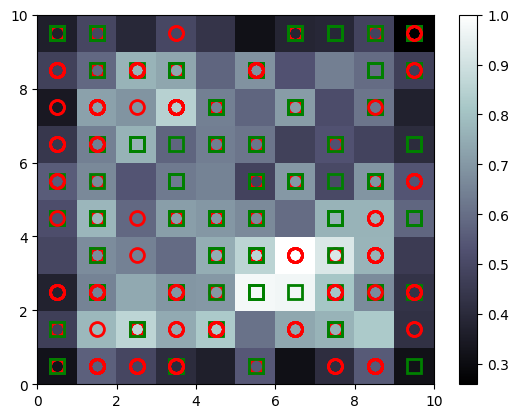

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o', 's']
colors=['r','g']
for i, x in enumerate(X):
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
    
show()

In [37]:
mappings=som.win_map(X)
# print(mappings)
print(mappings[(5,3)]) 
frauds=np.concatenate((mappings[(5,2)],mappings[(6,2)], mappings[(6,3)]),axis=0)
frauds=sc.inverse_transform(frauds)
print(frauds)



[array([0.17662746, 1.        , 0.22556391, 0.04160714, 0.5       ,
       0.23076923, 0.375     , 0.01754386, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.14      , 0.        ]), array([0.54448222, 1.        , 1.        , 0.19642857, 0.5       ,
       0.53846154, 0.375     , 0.01894737, 1.        , 0.        ,
       0.        , 0.        , 0.5       , 0.        , 0.0034    ]), array([0.5628261 , 1.        , 0.14285714, 0.03571429, 0.5       ,
       0.53846154, 0.375     , 0.02929825, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.15      , 0.        ]), array([0.35011152, 1.        , 0.03759398, 0.02982143, 0.5       ,
       0.46153846, 0.375     , 0.00298246, 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.1       , 0.        ]), array([0.94659411, 1.        , 0.09654135, 0.20089286, 0.5       ,
       0.61538462, 0.375     , 0.06      , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.06      